In [290]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from collections import Counter 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
import os
## Print all data files in my 'data' folder
print(os.listdir("./data"))

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


In [291]:
df=pd.read_csv("./data/Admission_Predict_Ver1.1.csv")
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [292]:
## Rename the columns to remove all spaces in the variable names
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "Chance of Admit ": "Admission_rate"})

## Also drop the 'Serial No.' variable 
df=df.drop("Serial No.",axis=1)
print("\nData frame after dropping the Serial No column:")
df.head(10)


Data frame after dropping the Serial No column:


,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_rate
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


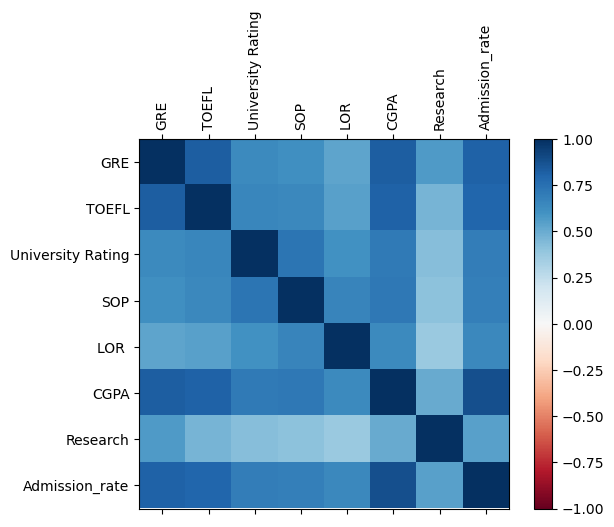

In [293]:
## Create a heatmap of the correlation matrix calculated from the dataframe
corr = df.corr()
fig, ax = plt.subplots()
cax = ax.matshow(corr, cmap='RdBu', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)
plt.show()

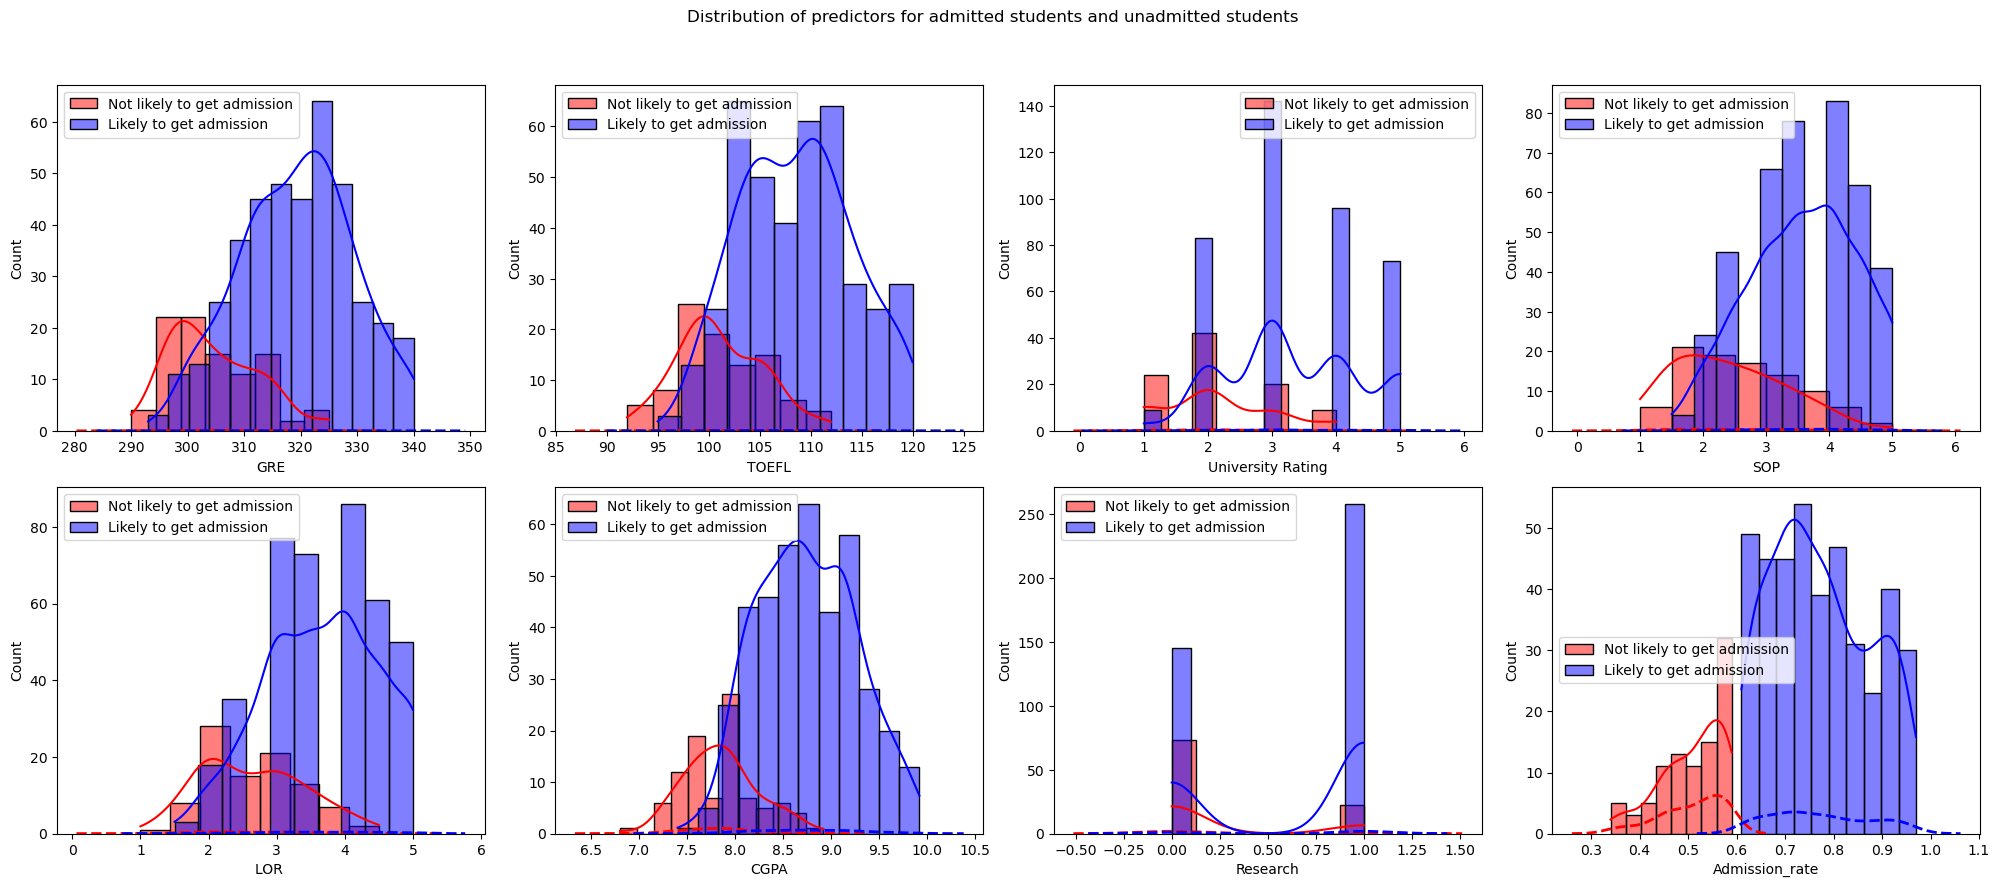

In [294]:
## See how admitted and unadmitted students are distributed for each variable
fig = plt.figure(figsize=(20, 25))
j = 0
for i in df.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    ## I set the threshold to 0.6; an admission rate of greater than 0.6 indicates a likely admission
    sns.histplot(df[i][df['Admission_rate'] < 0.6], color='r', label='Not likely to get admission', kde=True)
    sns.histplot(df[i][df['Admission_rate'] > 0.6], color='b', label='Likely to get admission', kde=True)
    plt.legend(loc='best')
    sns.kdeplot(df[i][df['Admission_rate'] < 0.6], color='r', linestyle='--', linewidth=2)
    sns.kdeplot(df[i][df['Admission_rate'] > 0.6], color='b', linestyle='--', linewidth=2)

fig.suptitle('Distribution of predictors for admitted students and unadmitted students ')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Visualize the distribution of the target variable

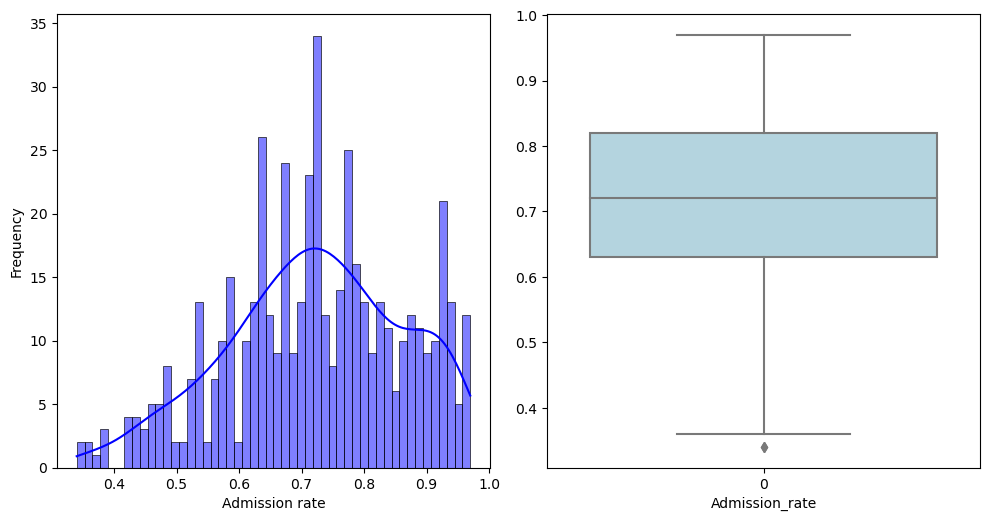

In [295]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['Admission_rate'], bins=50, color='blue', kde = True)
plt.xlabel('Admission rate')
plt.ylabel('Frequency')

# Plot a boxplot
plt.subplot(2, 2, 2)
sns.boxplot(df['Admission_rate'], color='lightblue')
plt.xlabel('Admission_rate')
plt.tight_layout()
plt.show()

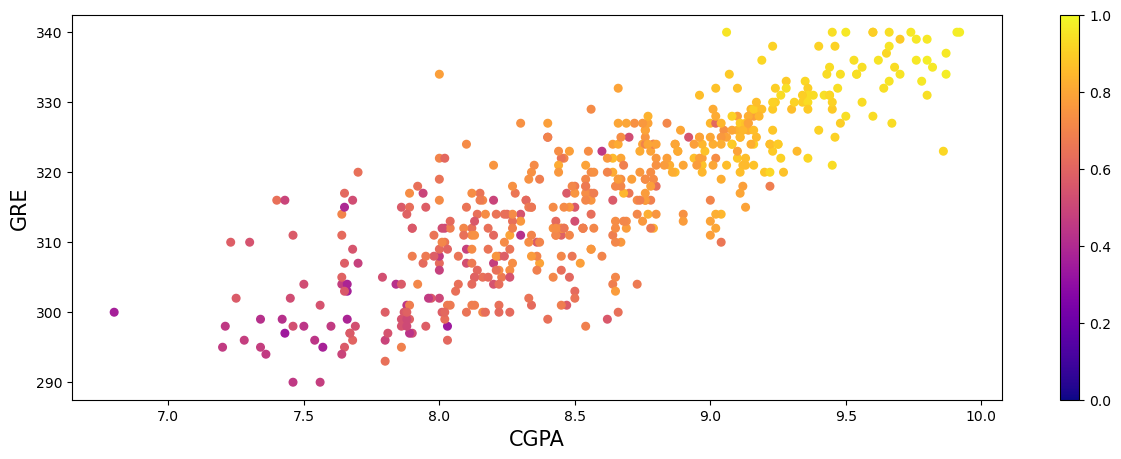

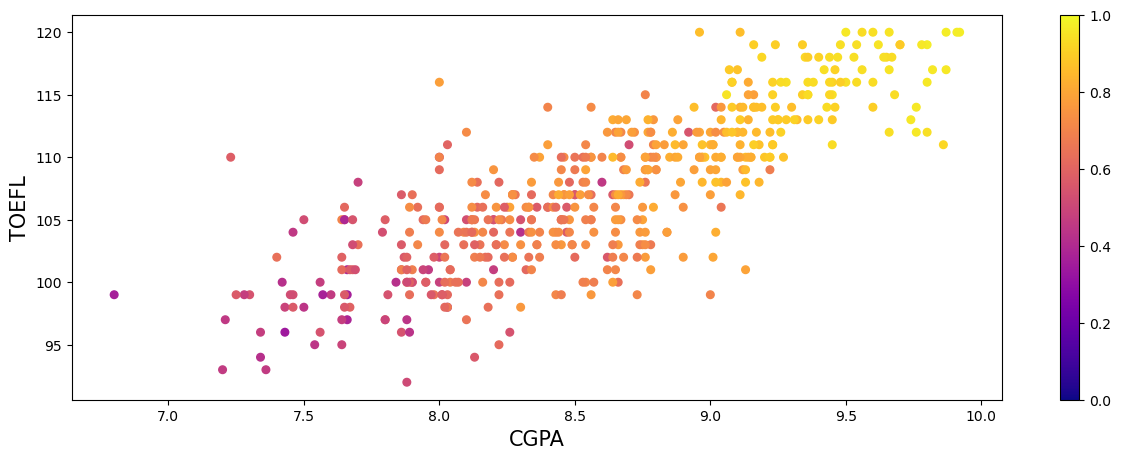

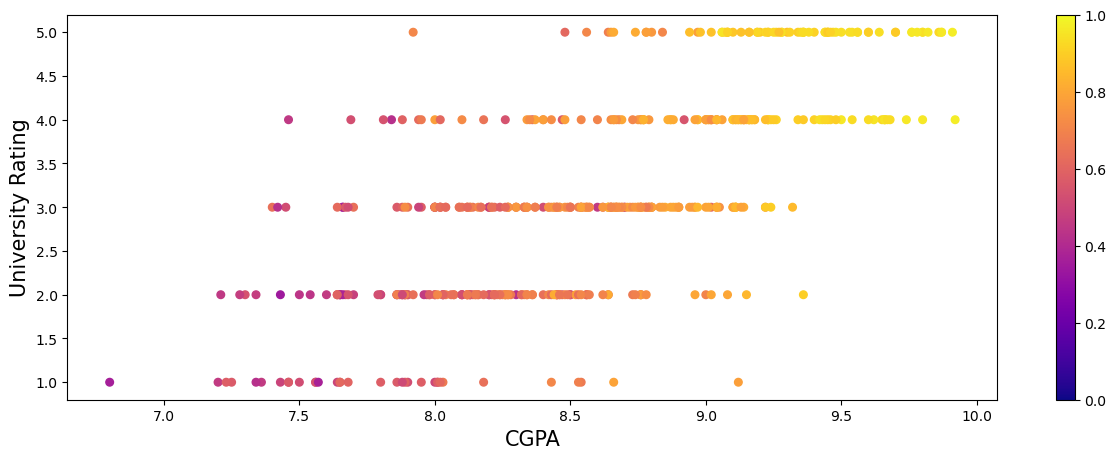

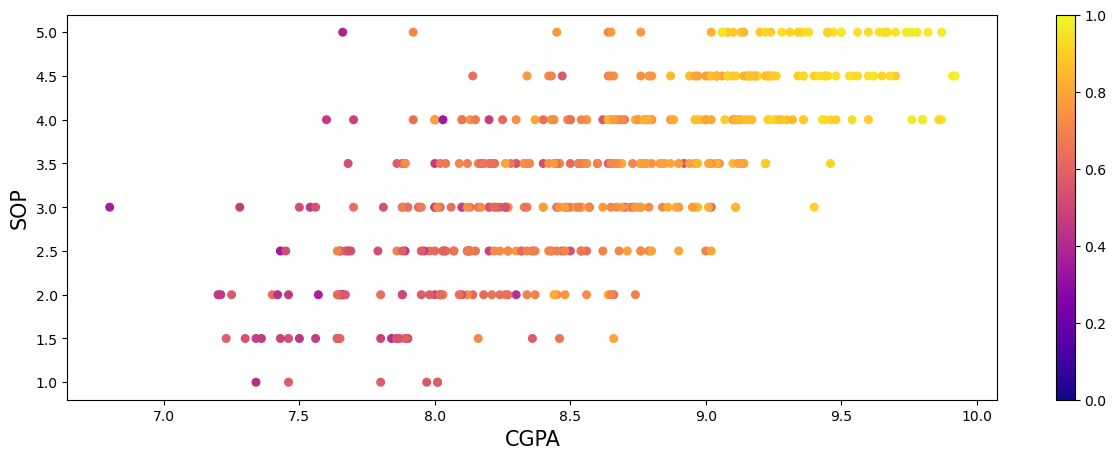

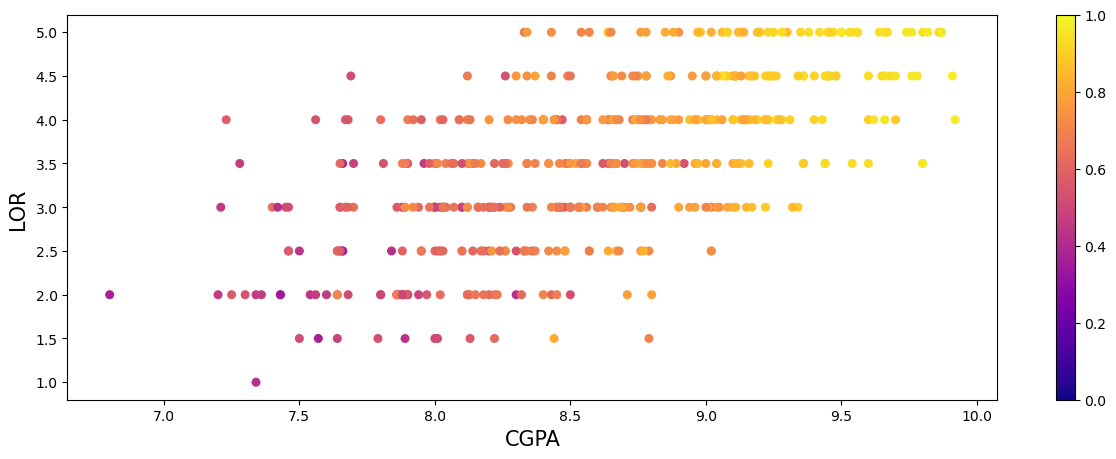

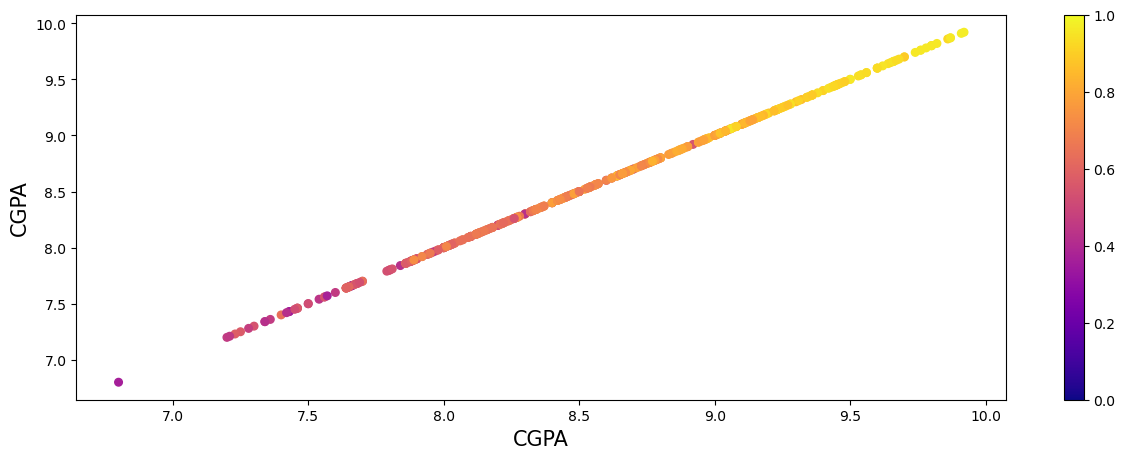

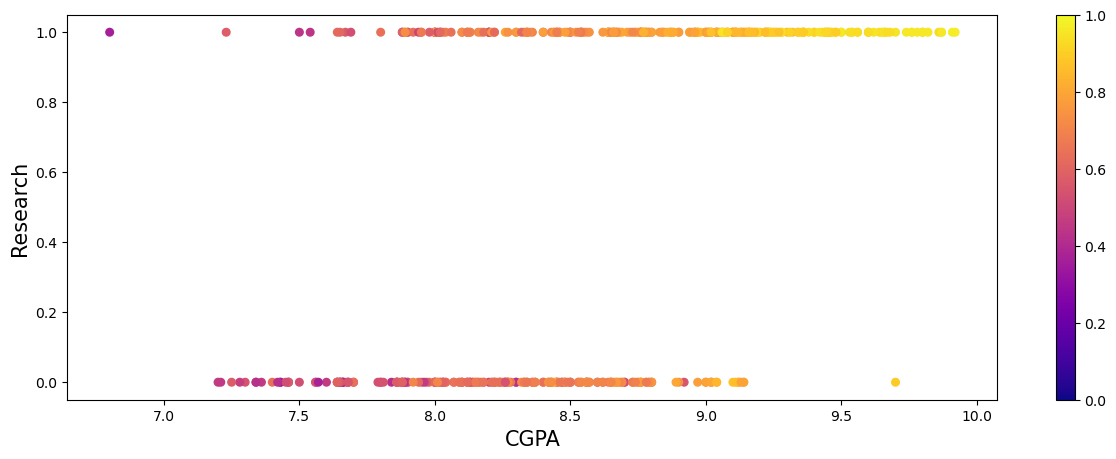

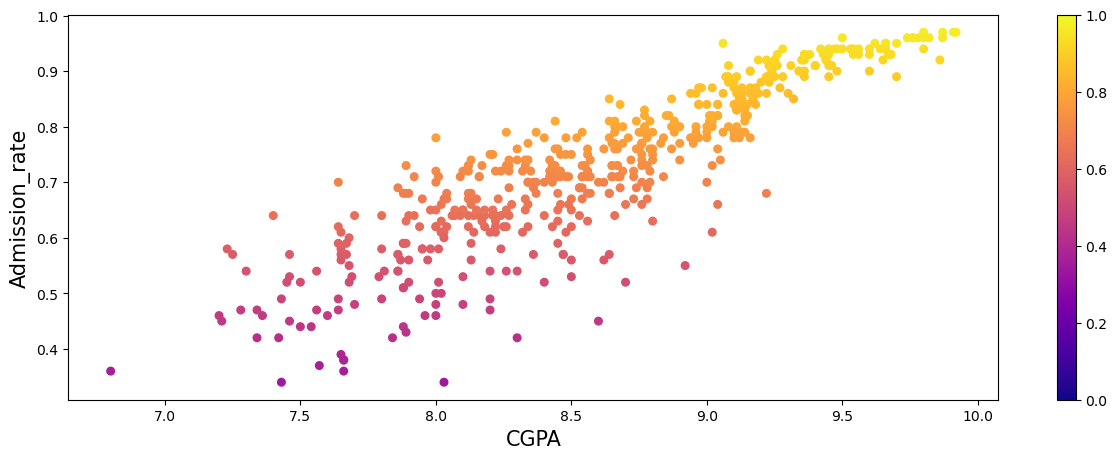

In [296]:
## Plot 'CGPA' against other variables
for column in df:
        plt.figure(figsize=(15, 5))
        plt.scatter(df['CGPA'], df[column], s=30, c=df['Admission_rate'], vmin=0, vmax=1, cmap='plasma')
        plt.xlabel('CGPA', fontsize=15)
        plt.ylabel(column, fontsize=15)
        plt.colorbar()
        plt.show()

# Fit a linear model 

<Axes: >

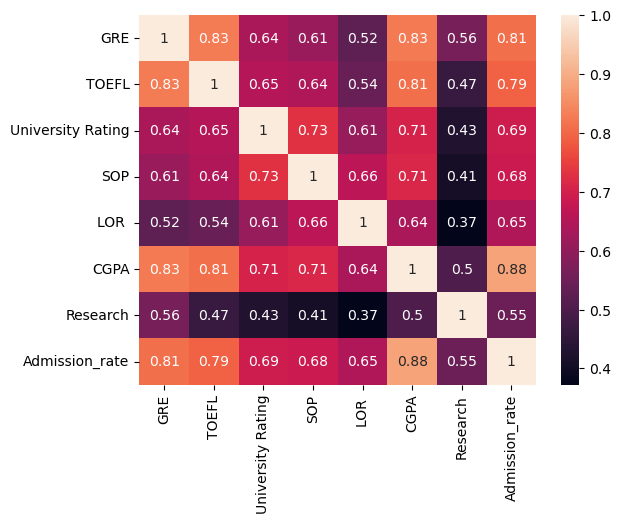

In [297]:
## fit a more readable heatmap to find variables that are strongly correlated with the target variable
sns.heatmap(df.corr(),annot=True)

## 'CGPA','GRE', 'University Rating', 'SOP', and 'TOEFL' are strongly correlated with the target variable

In [298]:
# Split data for test and train the model.
x_train, x_test, y_train, y_test = train_test_split(df[['CGPA','GRE','TOEFL', 'University Rating', 'SOP']]
,df[['Admission_rate']],random_state=40,test_size=.20)

x_train.shape

(400, 5)

In [299]:
y_train.shape

(400, 1)

In [300]:
linear = LinearRegression()
linear.fit(x_train,y_train)

predict = linear.predict(x_test)
error = metrics.mean_absolute_error(y_test,predict)
r_squared = r2_score(y_test, predict)
print("The R-squared value of this linear model is: \n ", r_squared)
print("The predicting error of this linear model is: \n", error)
## Print the coefficients of this linear model
print("Intercept of Linear Regression is:\n,",linear.intercept_, "\n", "Coefficients of Linear Regression are:\n,",linear.coef_)

The R-squared value of this linear model is: 
  0.7719761936191759
The predicting error of this linear model is: 
 0.04646152676083392
Intercept of Linear Regression is:
, [-1.44668488] 
 Coefficients of Linear Regression are:
, [[0.12074778 0.00228051 0.00330143 0.00886059 0.00874753]]


# Random forest model

The R-squared score and the mean squared error of this model are: 
 0.7924120839259865 0.004245172883713578
                          0
GRE                0.187612
TOEFL              0.024533
University Rating  0.008123
SOP                0.019104
LOR                0.018033
CGPA               0.732282
Research           0.010312


[]

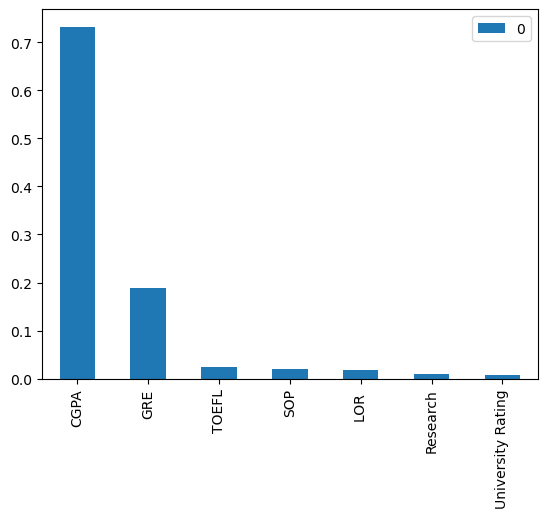

In [301]:
## this time I will use all predictor variables
predictors = df.iloc[:,:-1]
target = df.iloc[:,-1]
x_train, x_test, y_train, y_test= train_test_split(predictors , target , test_size=0.2, random_state=42)

random = RandomForestRegressor(n_estimators = 200,max_depth=6,random_state = 32,criterion="friedman_mse")
random.fit(x_train,y_train)
y_pred_rf = random.predict(x_test)
print("The R-squared score and the mean squared error of this model are: \n", r2_score(y_test,y_pred_rf), mean_squared_error(y_test,y_pred_rf))

feature_significance = pd.DataFrame(random.feature_importances_, predictors.columns)
print(feature_significance)

feature_significance = feature_significance.sort_values(by=0,ascending = False)
feature_significance.plot(kind='bar')
plt.plot()

# Try a decision tree model 

The R-squared score and the mean squared error of this model are: 
 0.6787698565005416 0.006569156434563928


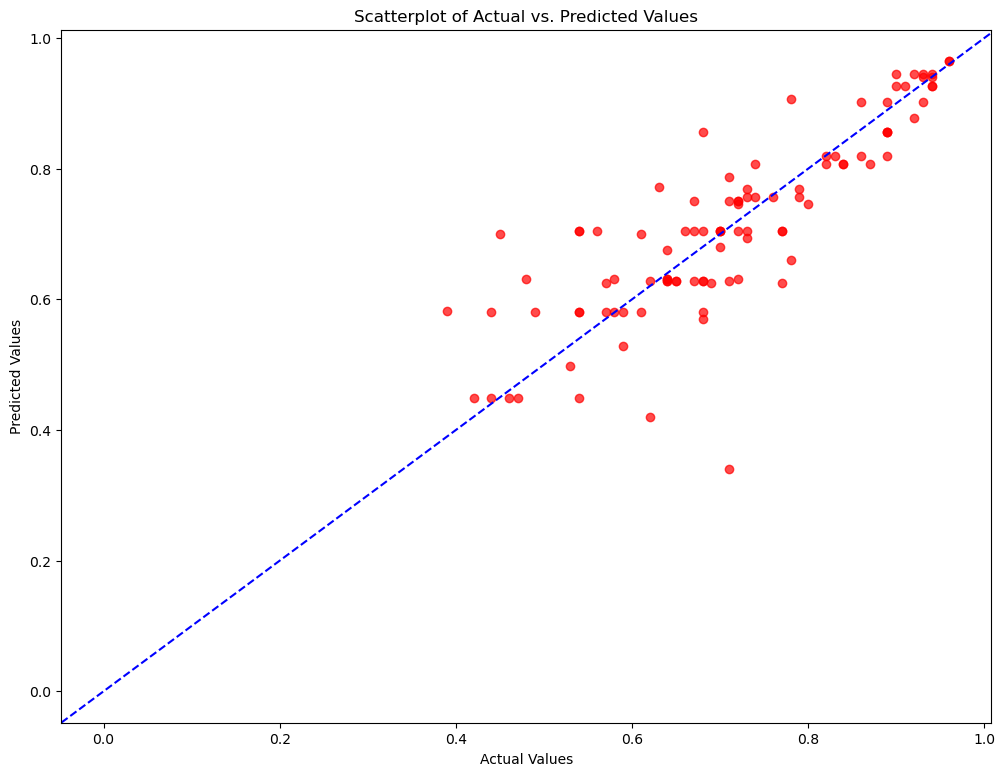

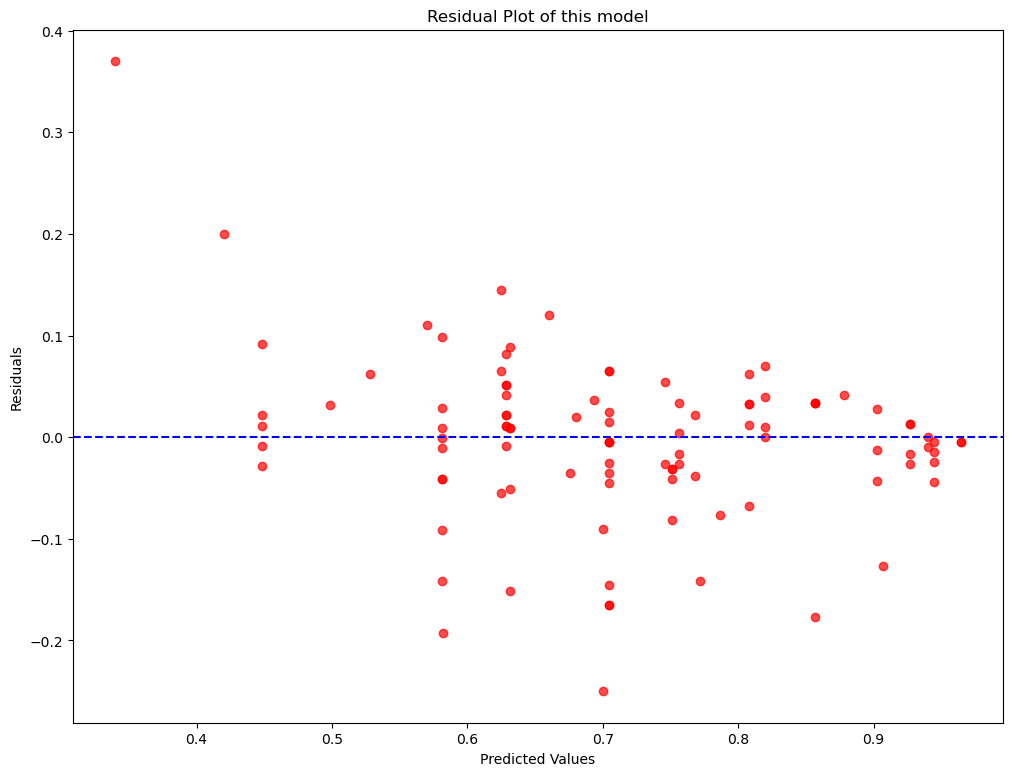

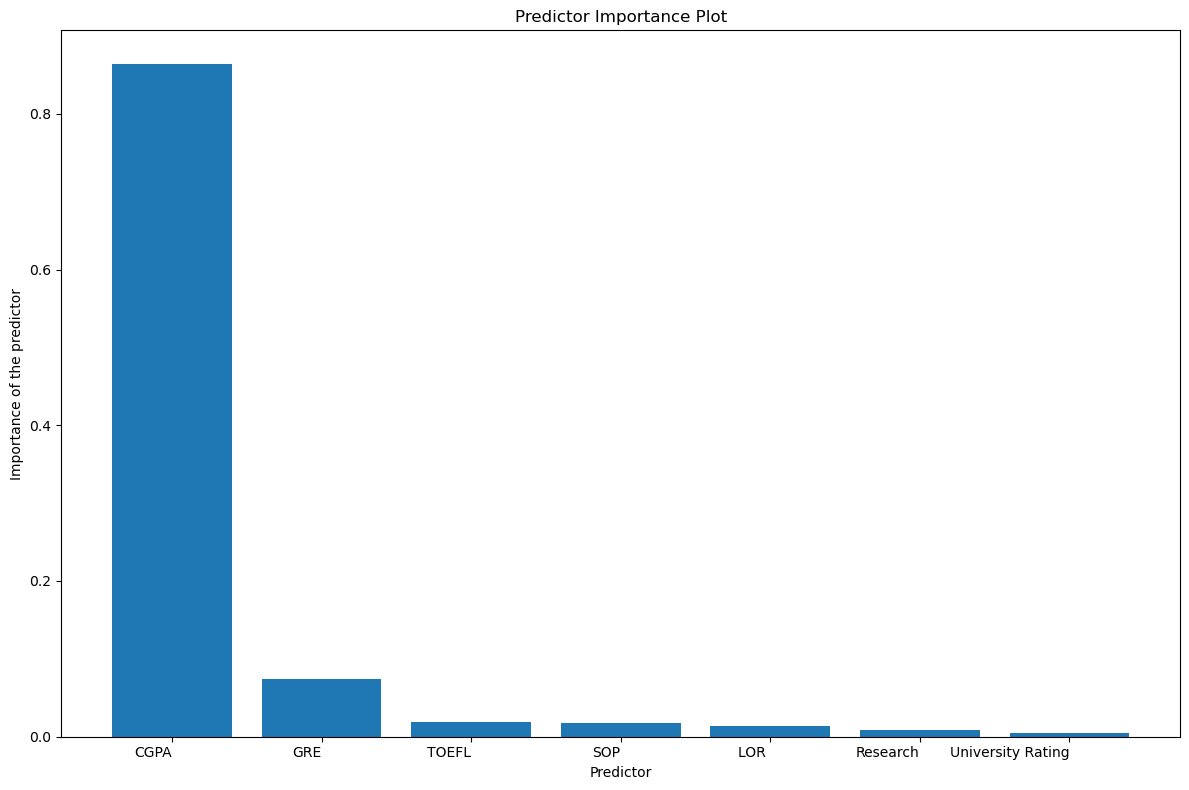

In [302]:
decisiontree = DecisionTreeRegressor(random_state = 1,max_depth=6)
decisiontree.fit(x_train,y_train)
y_pred_dt = decisiontree.predict(x_test) 
print("The R-squared score and the mean squared error of this model are: \n", r2_score(y_test,y_pred_dt),mean_squared_error(y_test,y_pred_dt))

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(12, 9))
plt.scatter(y_test, y_pred_dt, color='red', alpha=0.7)
plt.axline((0, 0), slope= 1, color='blue', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of Actual vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred_dt
plt.figure(figsize=(12, 9))
plt.scatter(y_pred_dt, residuals, color='red', alpha=0.7)
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of this model')
plt.show()

# Feature Importance plot
feature_significance1 = decisiontree.feature_importances_
sortedindices = np.argsort(feature_significance1)[::-1]
sortedfeatures = [x_train.columns[i] for i in sortedindices]
plt.figure(figsize=(12, 8))
plt.bar(range(len(sortedfeatures)), feature_significance1[sortedindices])
plt.xticks(range(len(sortedfeatures)), sortedfeatures, rotation=0, ha='right')
plt.xlabel('Predictor')
plt.ylabel('Importance of the predictor')
plt.title('Predictor Importance Plot')
plt.tight_layout()
plt.show()

# Fit different classifiers, logistic regression, set admission rate >= 0.7 as 1 and 0 for admission rate <= 0.7

In [303]:
# First find the distribution of the discrete values: 0.1 as interval
rounded_values = [round(rate * 10) / 10 for rate in df["Admission_rate"]]
rounded_counter = Counter(rounded_values)
descending_result = rounded_counter.most_common()[::-1]
print(descending_result)

[(0.3, 2), (1.0, 17), (0.4, 17), (0.5, 42), (0.9, 86), (0.6, 97), (0.8, 115), (0.7, 124)]


In [304]:
df['binaryadmission']= np.where(df['Admission_rate']<=0.7,0,1)
print(df['binaryadmission'].value_counts())
df.head(5)

binaryadmission
1    287
0    213
Name: count, dtype: int64


,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_rate,binaryadmission
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [305]:
X = df.drop(columns = ["Admission_rate","binaryadmission"])
y = df["binaryadmission"]

X_train, X_test, y_train, y_test=train_test_split(X , y, test_size=0.2, random_state=32)
print(" X_train Shape {},\n y_train Shape {},\n X_test Shape {},\n y_test Shape {}," .format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

 X_train Shape (400, 7),
 y_train Shape (100, 7),
 X_test Shape (400,),
 y_test Shape (100,),


In [306]:
class Classifier:
    def __init__(self, params):
        self.params = params
        self.model = None

    def fit(self, X_train, y_train, classifier):
        if classifier == 'logistic':
            self.model = LogisticRegression(**self.params)
        elif classifier == 'lda':
            self.model = LinearDiscriminantAnalysis(**self.params)
        elif classifier == 'qda':
            self.model = QuadraticDiscriminantAnalysis(**self.params)
        elif classifier == 'svm':
            self.model = SVC(**self.params)
        else:
            raise ValueError("Invalid input")
        
        self.model.fit(X_train, y_train)

    def tune(self, X_train, y_train, X_val, y_val, classifier):
        if classifier == 'logistic':
            self.tune_logistic(X_train, y_train, X_val, y_val)
        elif classifier == 'lda':
            self.tune_lda(X_train, y_train, X_val, y_val)
        elif classifier == 'qda':
            self.tune_qda(X_train, y_train, X_val, y_val)
        elif classifier == 'svm':
            self.tune_svm(X_train, y_train, X_val, y_val)
        else:
            raise ValueError("Invalid input")

    def tune_logistic(self, X_train, y_train, X_val, y_val, penalty='l2'):
        C_values = np.linspace(0.001, 0.01, num=50)
        best_score = 0
        best_C = 0
        for C in C_values:
            model = LogisticRegression(C=C, penalty=penalty, **self.params)
            model.fit(X_train, y_train)
            score = model.score(X_val, y_val)
            if score > best_score:
                best_score = score
                best_C = C

        self.model = LogisticRegression(C=best_C, penalty=penalty, **self.params)
        self.model.fit(X_train, y_train)
        self.plot(X_val, y_val)
        self.report(X_val, y_val)
        
    def tune_lda(self, X_train, y_train, X_val, y_val):
        self.model = LinearDiscriminantAnalysis(**self.params)
        self.model.fit(X_train, y_train)
        self.plot(X_val, y_val)
        self.report(X_val, y_val)

    def tune_qda(self, X_train, y_train, X_val, y_val):
        self.model = QuadraticDiscriminantAnalysis(**self.params)
        self.model.fit(X_train, y_train)
        self.plot(X_val, y_val)
        self.report(X_val, y_val)

    def tune_svm(self, X_train, y_train, X_val, y_val):
        self.model = SVC(**self.params)
        self.model.fit(X_train, y_train)
        self.plot(X_val, y_val)
        self.report(X_val, y_val)

    def plot(self, X_test, y_test):
        cm = confusion_matrix(y_test, self.model.predict(X_test))
        score = self.model.score(X_test, y_test)
        plt.figure(figsize=(9,9))
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        all_sample_title = 'Accuracy Score: {0}'.format(score)
        plt.title(all_sample_title, size=15)
        plt.show()
        y_score = self.model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_score)

        # Plot the ROC curve
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='right')
        plt.show()
       
    def report(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        report = classification_report(y_test, y_pred)
        print(report)

## Logistic classifier

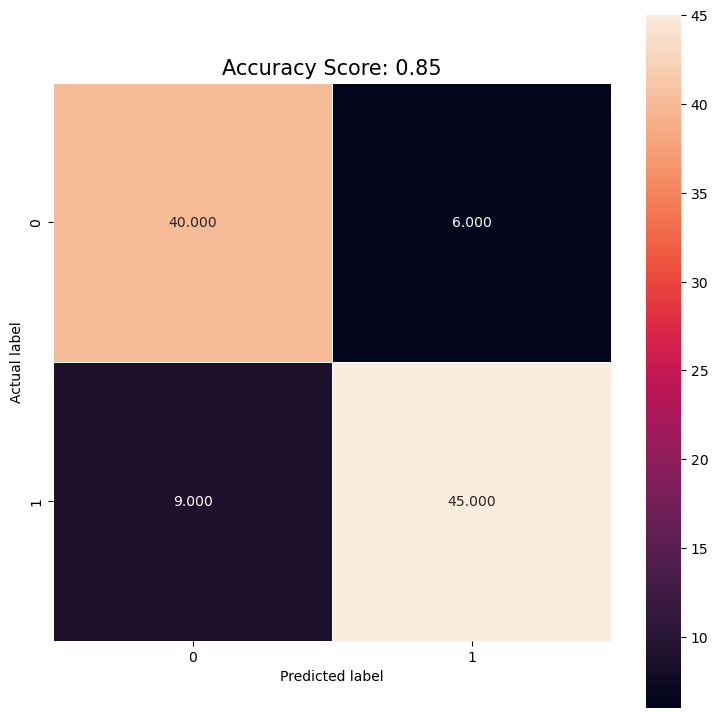

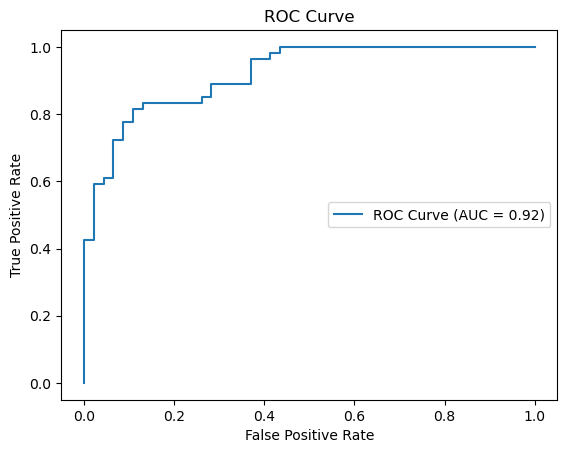

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        46
           1       0.88      0.83      0.86        54

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



In [307]:
param = {'fit_intercept': True,'max_iter': 150, 'multi_class': 'auto'}
model = Classifier(param)
model.fit(X_train, y_train, 'logistic')
model.tune(X_train, y_train, X_test, y_test, 'logistic')


## LDA classifier

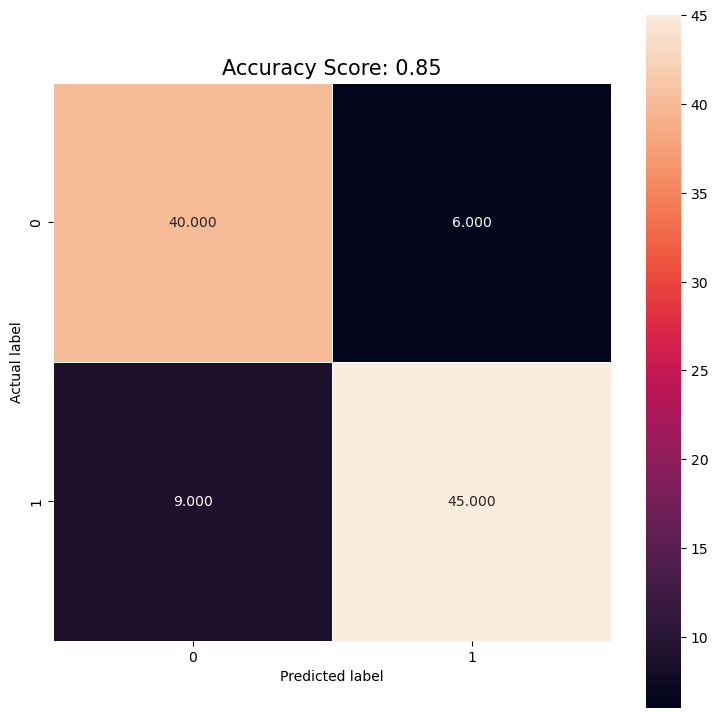

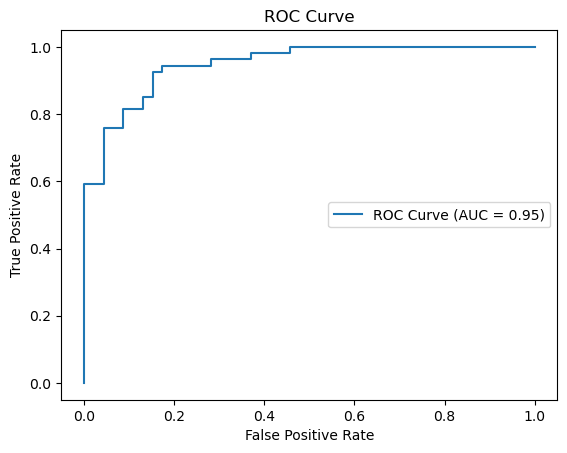

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        46
           1       0.88      0.83      0.86        54

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



In [308]:
param = {'priors': None, 'store_covariance': True,  'tol': 0.0001}
model = Classifier(param)
model.fit(X_train, y_train, 'lda')
model.tune(X_train, y_train, X_test, y_test, 'lda')

## QDA classifier

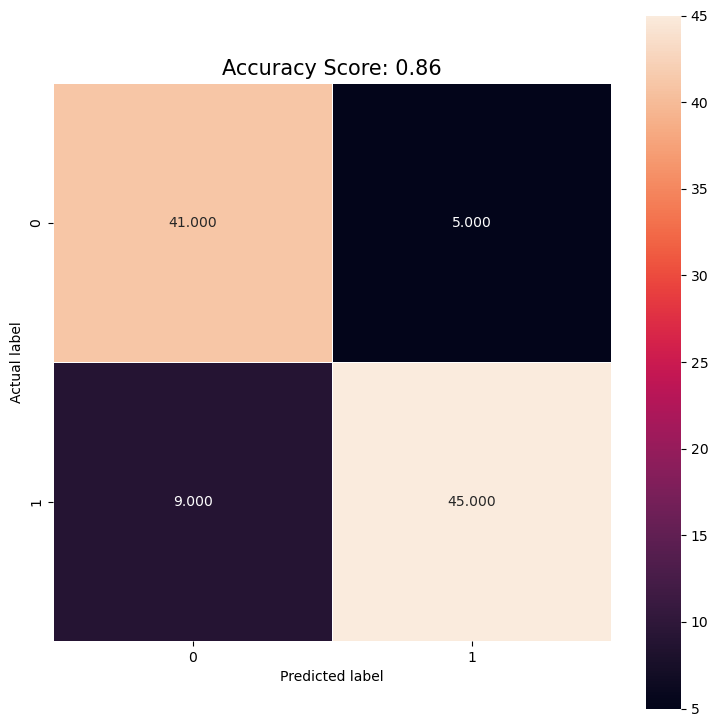

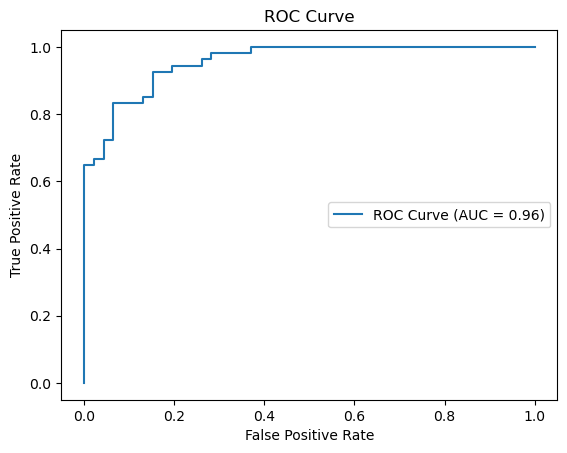

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        46
           1       0.90      0.83      0.87        54

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [309]:
param = { 'priors': None,  'tol': 0.0001}
model = Classifier(param)
model.fit(X_train, y_train, 'qda')
model.tune(X_train, y_train, X_test, y_test, 'qda')

## SVM classifier

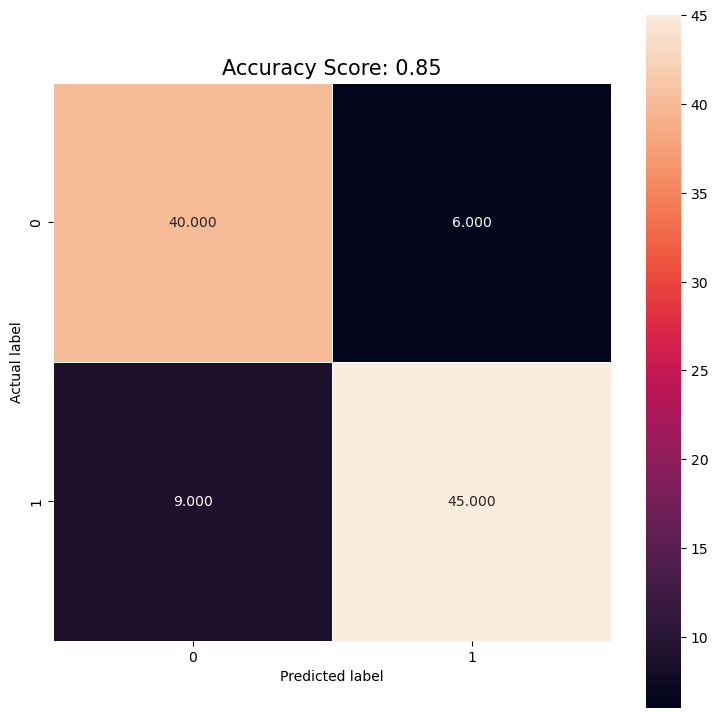

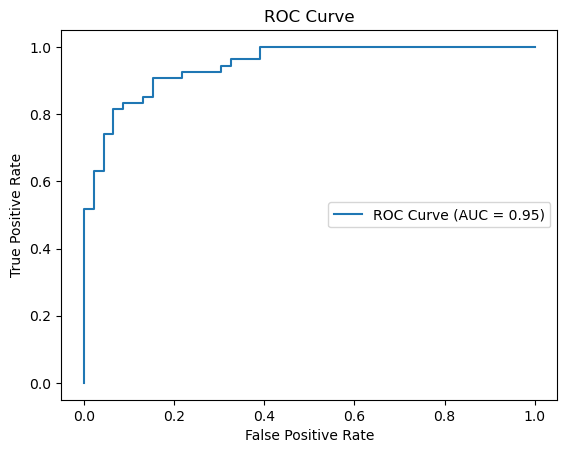

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        46
           1       0.88      0.83      0.86        54

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



In [310]:
param = {'C': 4, 'kernel': 'linear','degree': 5}
model = Classifier(param)
model.fit(X_train, y_train, 'svm')
model.tune(X_train, y_train, X_test, y_test, 'svm')

## Conclusion on the classifier part:
QDA is the optimal classifier model given its highest ROC value.

# Fit different regressors: ridge, gradient_boosting, and svr

In [311]:
X_train, X_val, y_train, y_val = train_test_split(predictors, target, test_size=0.2, random_state=42)

class Regressor:
    def __init__(self, params):
        self.params = params
        self.model = None

    def fit(self, X_train, y_train, regressor):
        if regressor == 'ridge':
            self.model = Ridge(**self.params)
        elif regressor == 'gradient_boosting':
            self.model = GradientBoostingRegressor(**self.params)
        elif regressor == 'svm':
            self.model = SVR(**self.params)  
        else:
            raise ValueError("Invalid input")
        
        self.model.fit(X_train, y_train)

    def tune(self, X_train, y_train, X_val, y_val, regressor):
        if regressor == 'ridge':
            self.tune_ridge(X_train, y_train, X_val, y_val)
        elif regressor == 'gradient_boosting':
            self.tune_gradient_boosting(X_train, y_train, X_val, y_val)
        elif regressor == 'svm':
            self.tune_svm(X_train, y_train, X_val, y_val)
        else:
            raise ValueError("Invalid input")

    def tune_ridge(self, X_train, y_train, X_val, y_val):
        self.model = Ridge(**self.params)
        self.model.fit(X_train, y_train)
        self.plot(X_val, y_val)
        self.report(y_val, self.model.predict(X_val))

    def tune_gradient_boosting(self, X_train, y_train, X_val, y_val):
        self.model = GradientBoostingRegressor(**self.params)
        self.model.fit(X_train, y_train)
        self.plot(X_val, y_val)
        self.report(y_val, self.model.predict(X_val))

    def tune_svm(self, X_train, y_train, X_val, y_val):
        self.model = SVR(**self.params)  
        self.model.fit(X_train, y_train)
        self.plot(X_val, y_val)
        self.report(y_val, self.model.predict(X_val))

    def plot(self, X_test, y_test):
        plt.scatter(y_test, self.model.predict(X_test), color='blue', alpha=0.7)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle=':')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Scatterplot of Actual vs. Predicted Values')
        plt.show()

        plt.scatter(self.model.predict(X_test), self.model.predict(X_test) - y_test, color='blue', alpha=0.7)
        plt.axhline(y=0, color='red', linestyle=':')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title('Residual Plot')
        plt.show()
       
    def report(self, y_true, y_pred):
        r2 = r2_score(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        print("The R-squared Score for this model is:",  r2)
        print("The Mean Squared Error for this model is:", mse)

## Ridge model

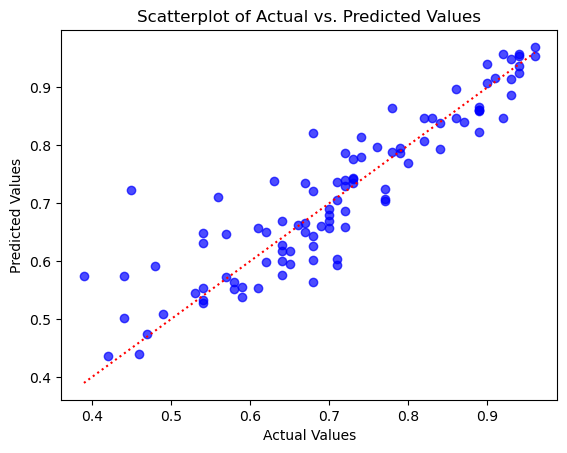

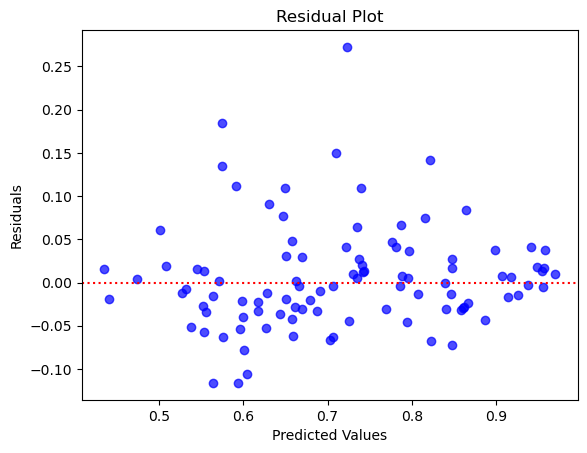

The R-squared Score for this model is: 0.8179793486575073
The Mean Squared Error for this model is: 0.0037223223199539758


In [312]:
param = {'alpha': 1.0, 'solver': 'auto'}
model = Regressor(param)
model.fit(X_train, y_train, 'ridge')
model.tune(X_train, y_train, X_val, y_val, 'ridge')

## Gradient boosting model

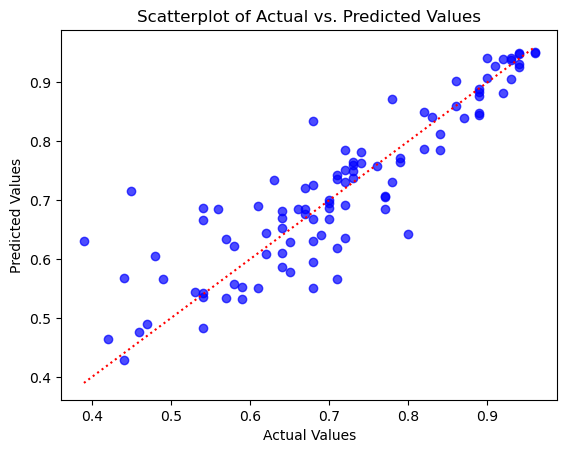

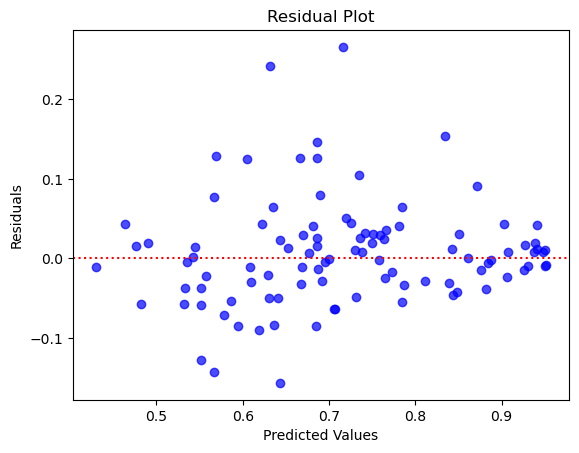

The R-squared Score for this model is: 0.7799456695447381
The Mean Squared Error for this model is: 0.004500111057810106


In [313]:
param = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}
model = Regressor(param)
model.fit(X_train, y_train, 'gradient_boosting')
model.tune(X_train, y_train, X_val, y_val, 'gradient_boosting')

## SVM model

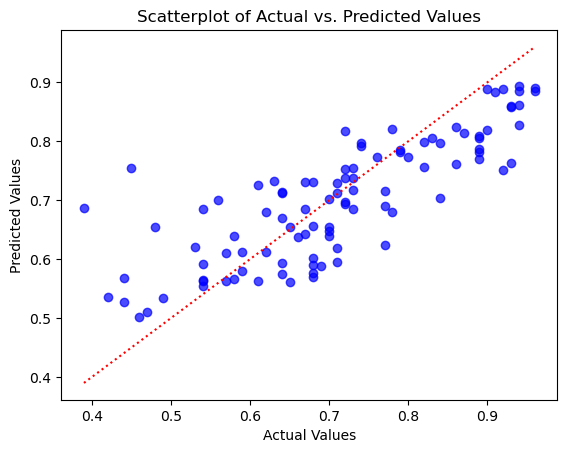

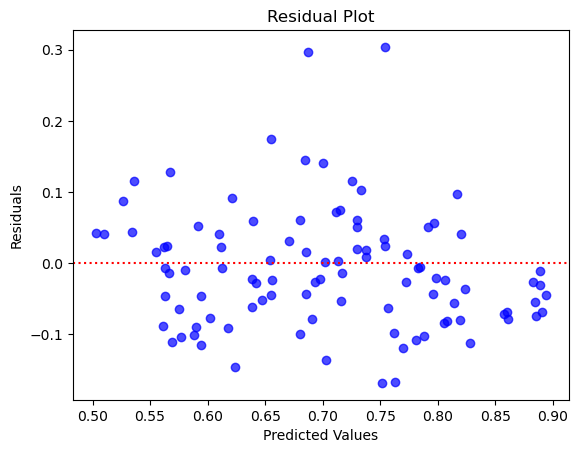

The R-squared Score for this model is: 0.6489352664633703
The Mean Squared Error for this model is: 0.00717927380082408


In [314]:
param = {'kernel': 'rbf', 'C': 1.0, 'epsilon': 0.1}
model = Regressor(param)
model.fit(X_train, y_train, 'svm')
model.tune(X_train, y_train, X_val, y_val, 'svm')

## Conclusion on the regressor part:
The 'Ridge' model is the optimal model among the above three models.

# Fit ANN model 

In [315]:
## Data normalization
X_train = preprocessing.normalize(X_train, axis=0)
X_val = preprocessing.normalize(X_val, axis=0)
y_train = preprocessing.normalize(pd.DataFrame(y_train), axis=0)
y_val = preprocessing.normalize(pd.DataFrame(y_val), axis=0)

31


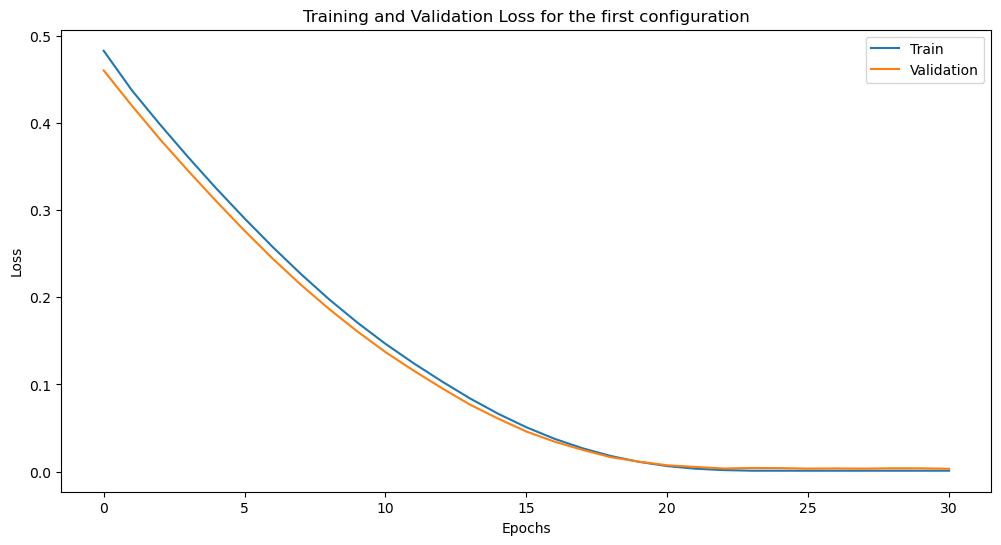

Test Loss of this ANN model on the testing dataset is : 0.0032211581710726023


In [316]:
input_shape=(X_train.shape[1],)
callback = keras.callbacks.EarlyStopping(monitor='loss',patience=5)

optimizer="rmsprop"
loss_function="MeanSquaredError" 
learning_rate=0.001
numbers_epochs=100

# Fit the ANN model
model1 = keras.Sequential([
    layers.Dense(10, activation='sigmoid', input_shape=input_shape, kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(1, activation='tanh'),
    ])

model1.compile(optimizer=optimizer, loss=loss_function)  
history = model1.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val),
                        callbacks=[callback], verbose=0)
print(len(history.history['loss']))      # check how many epochs are run

# Plot the progress
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for the first configuration')
plt.show()

# Fit the model on the testing set and print out the final testing loss
test_loss = model1.evaluate(X_val, y_val, verbose=0)
print("Test Loss of this ANN model on the testing dataset is :", test_loss)

## Conclusion:
The ANN model does a better job in that it has a smaller MSE value.